# Notes

# Preamble (must run)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from utils import read_stats, assign_channels, plot_kde, filter_df, add_jitter, purity_thresholds, bin_norm_heatmap, bin_wise_boxplot
import scipy
from itertools import combinations, product
from tqdm import tqdm
import traceback
import scipy.stats
import sklearn
import sklearn.metrics
import os
import pickle
import timeit
import skmisc.loess
plt.rcParams['figure.figsize'] = [10,10]
rng = np.random.default_rng()

# Define samples and channels (must run)

In [3]:
channels={1:'GFP',2:'Polr2a',3:'CD86',4:'MHCII',5:'PDL1',6:'cMyc',7:'CD4',8:'CellTracker Deep Red'}

def condition(sample):
    if sample%2==0:
        return 'OVA'
    else:
        return 'KLH'

In [4]:
# os.listdir('..\\250104_flu')

# Import Segmentation Data  (must run)

In [5]:
imported=False

if not imported:
    cells={}
    # for sample in samples:
    #     cells[f'{sample}_paracortex']=assign_channels(read_stats(f'..\\240727_ovakldh\\{sample}_paracortex_Statistics',grouped_images=False,verbose=False),channels)
    # for surface in cell_types.keys(): #import segmented Tconv Treg and migratory cell data
    temp_df=assign_channels(read_stats(f'..\\250530_ova_klh_inflammation\\mAPC_Statistics',grouped_images=True,verbose=False),channels)
    for name,group in temp_df.groupby('Original Image Name'):
        sample_no=name[name.find('R '):][2] # part of the image name after 'Region'
        cells[int(sample_no)]=group
    #     pt_idx=sample_end[0]
    #     sample_end=name[name.find('Region'):][7:]
    #     sample_idx=sample_end[:sample_end.find('Merged')][:-1] # part of the image name before 'Merged'
    #     print(f'{pt_idx}-{sample_idx}')
    #     cells[sample_dict[f'{pt_idx}-{sample_idx}']].append(group)
        
# for sample in samples:
#     cells[sample]=pd.concat(cells[sample])

#         cells[f'r{sample}_paracortex']=group
#     with open("250108_cell_data.pickle",'wb') as f:
#         pickle.dump(cells,f)
# else:
#     with open('250108_cell_data.pickle','rb') as f:
#         cells=pickle.load(f)

[None, None, None, None, None, None]

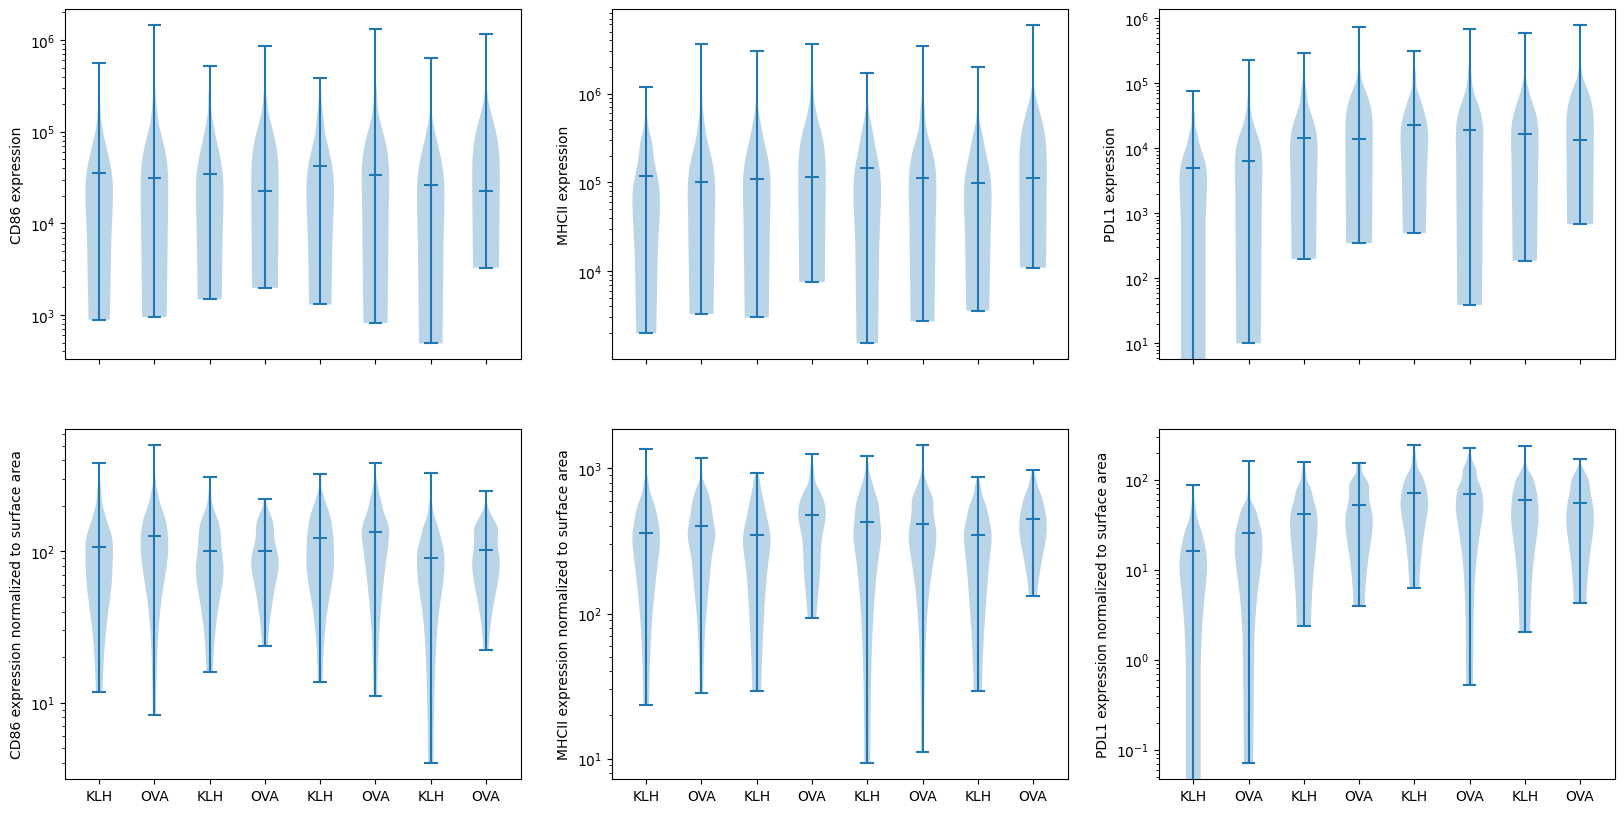

In [6]:
fig,axs=plt.subplots(2,3,figsize=(20,10),sharex=True)
for i,marker in enumerate(['CD86','MHCII','PDL1']):
    axs[0,i].violinplot([cells[j][f'Intensity_Sum_{marker}'] for j in range(1,9)],showmedians=True)
    axs[0,i].set_ylabel(f'{marker} expression')
    axs[1,i].violinplot([np.array(cells[i][f'Intensity_Sum_{marker}'])/np.array(cells[i]['Area']) for i in range(1,9)],showmedians=True)
    axs[1,i].set_ylabel(f'{marker} expression normalized to surface area')
    axs[1,i].set_xticks(np.arange(1,9),labels=[condition(j) for j in range(1,9)])
plt.setp(axs,yscale='log')


Text(0, 0.5, 'CD86 expression per surface area')

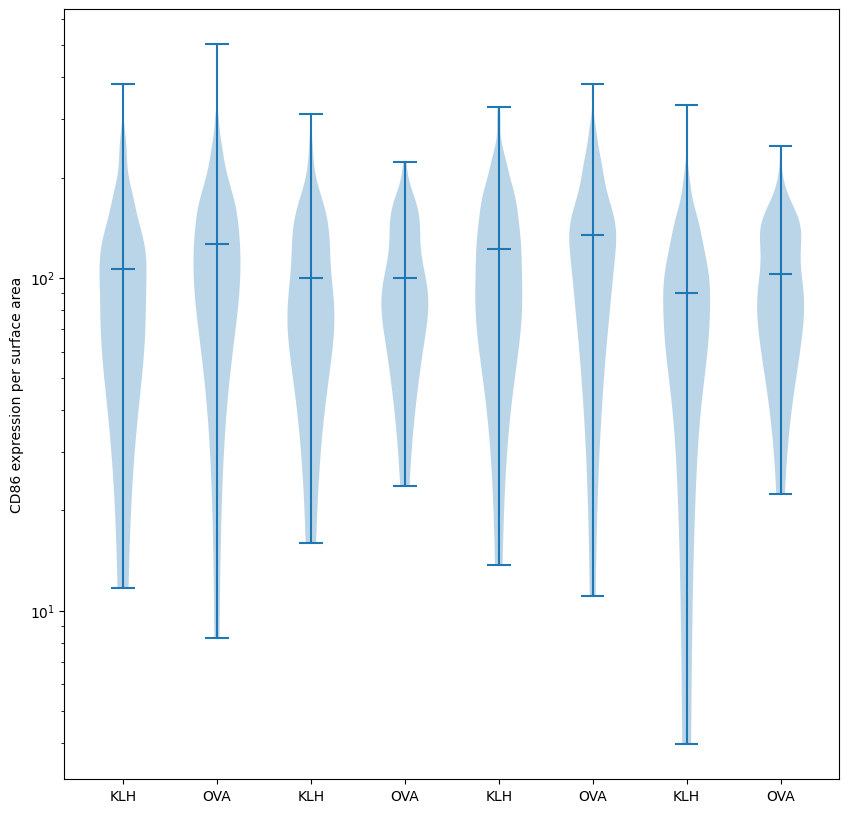

In [7]:
plt.violinplot([np.array(cells[i]['Intensity_Sum_CD86'])/np.array(cells[i]['Area']) for i in range(1,9)],showmedians=True)
plt.xticks(np.arange(1,9),labels=[condition(i) for i in range(1,9)])
plt.yscale('log')
plt.ylabel('CD86 expression per surface area')

Text(0, 0.5, 'MHCII sum')

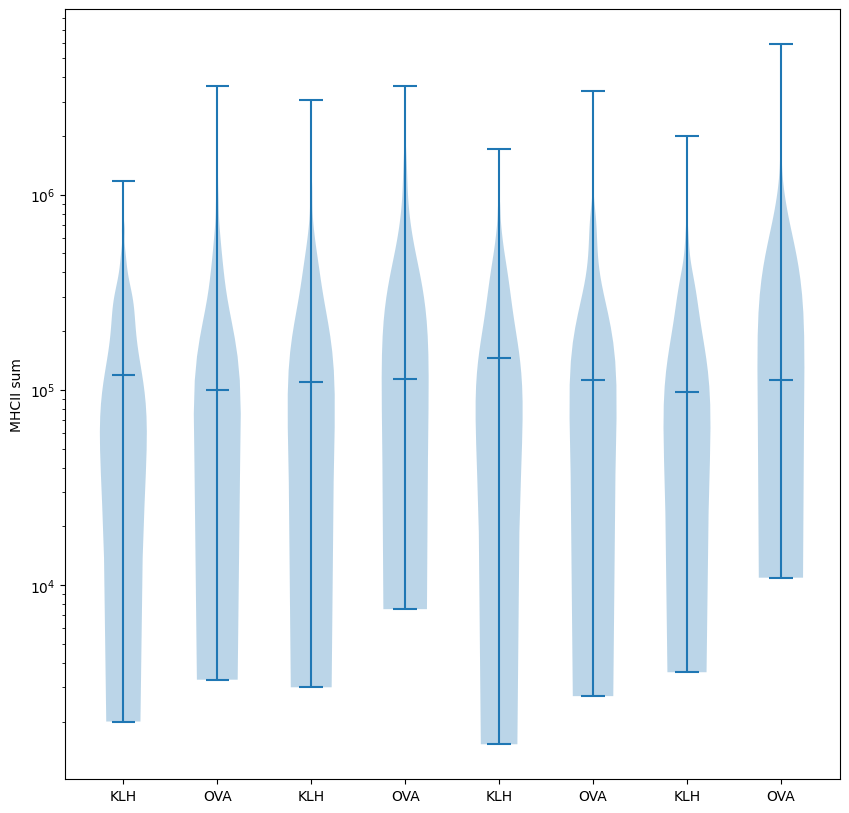

In [8]:
plt.violinplot([cells[i]['Intensity_Sum_MHCII'] for i in range(1,9)],showmedians=True)
plt.xticks(np.arange(1,9),labels=[condition(i) for i in range(1,9)])
plt.yscale('log')
plt.ylabel('MHCII sum')

Text(0, 0.5, 'MHCII sum')

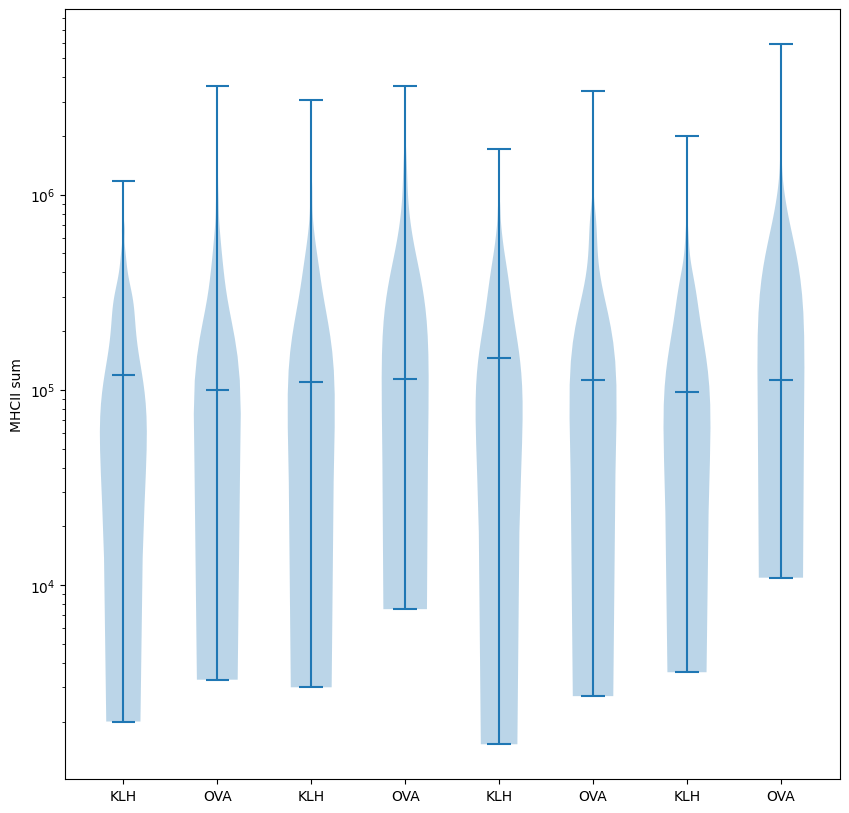

In [9]:
plt.violinplot([cells[i]['Intensity_Sum_MHCII'] for i in range(1,9)],showmedians=True)
plt.xticks(np.arange(1,9),labels=[condition(i) for i in range(1,9)])
plt.yscale('log')
plt.ylabel('MHCII sum')